In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Fetch daily data for the Index from Yahoo Finance
Index = yf.Ticker('^KLSE').history (period = 'max', interval='1mo')
#Index = yf.Ticker('^KLSE').history (period = 'max', interval='1mo')
Index

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1994-01-01 00:00:00+08:00,1278.609985,1332.040039,967.919983,1106.989990,0,0.0,0.0
1994-02-01 00:00:00+08:00,1114.319946,1158.130005,1065.010010,1125.630005,0,0.0,0.0
1994-03-01 00:00:00+08:00,1124.959961,1125.630005,936.799988,952.719971,0,0.0,0.0
1994-04-01 00:00:00+08:00,954.489990,1067.750000,920.280029,1054.500000,0,0.0,0.0
1994-05-01 00:00:00+08:00,1054.130005,1054.130005,983.450012,993.729980,0,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-01 00:00:00+08:00,1492.670044,1527.839966,1464.829956,1512.050049,4723634700,0.0,0.0
2022-09-01 00:00:00+08:00,1498.010010,1503.489990,1390.410034,1394.630005,4812094000,0.0,0.0
2022-10-01 00:00:00+08:00,1393.699951,1468.410034,1372.569946,1460.380005,4200012200,0.0,0.0


In [3]:
# Calculate daily returns
Index['return'] = Index['Close'].pct_change()

In [4]:
# Calculate annual returns
returns = Index['return'].groupby(Index['return'].index.year).apply(lambda x: (1 + x).prod() - 1) * 100

In [5]:
# Calculate the average return
average_return = np.mean(returns)
print(average_return)  

3.262996952077125


In [6]:
# Calculate the average return
median_return = np.median(returns)
print(median_return)  

0.7781860691602027


Visualisation

In [7]:
# Extract the return data and the dates
returns = Index['return'] * 100
dates = Index.index

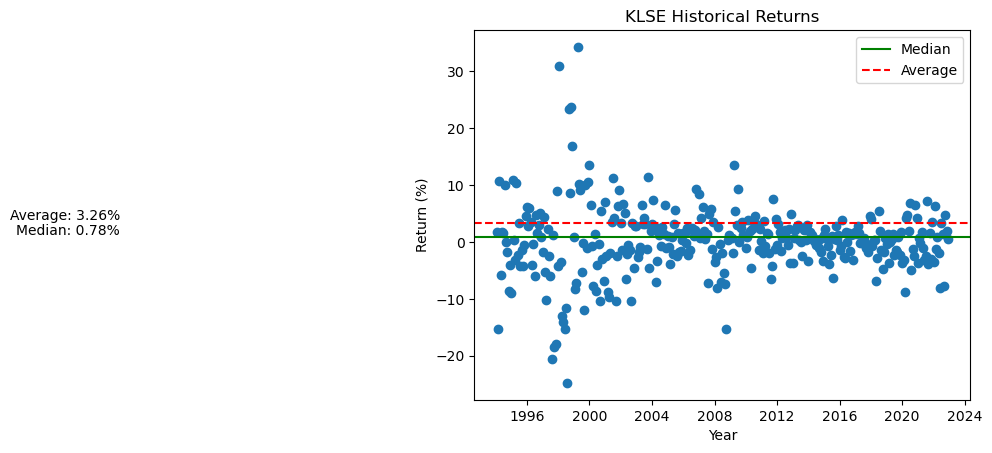

In [31]:
# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Return (%)')
plt.title('KLSE Historical Returns')

# Create a scatterplot of the returns data
plt.scatter(dates, returns)

# Draw a horizontal line 
plt.axhline(y=median_return, color='g', linestyle='-', label = 'Median')
plt.axhline(y=average_return, color='r', linestyle='--', label = 'Average')

# Add a text annotation to the plot showing the value of the average
plt.text(x=0, y=median_return, s=f'Median: {median_return:.2f}%', horizontalalignment='right', verticalalignment='bottom')
plt.text(x=0, y=average_return, s=f'Average: {average_return:.2f}%', horizontalalignment='right', verticalalignment='bottom')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()